# Introduction

This notebook comprises the coding/techniques that have been used to develop a machine learning algorithm that can predicit dangerous traffic situations (causing injuries) and consists of the following sections:
- Pre-processing
- Data exploration
- Training
- Testing
- Evaluation
- Mapping

# Pre-processing

In [2]:
import pandas as pd

# import data
usecols = ['SEVERITYCODE', 'JUNCTIONTYPE', 'ROADCOND', 'LIGHTCOND', 'WEATHER', 'X', 'Y']
data = pd.read_csv(r'C:\Users\mbru\PycharmProjects\Notebooks\Coursera_Python\Data-Collisions.csv', usecols = usecols)
data.head(10)

,SEVERITYCODE,X,Y,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,-122.347294,47.647172,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,-122.334803,47.604803,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,-122.306426,47.545739,At Intersection (intersection related),Raining,Wet,Daylight
5,1,-122.387598,47.690575,At Intersection (intersection related),Clear,Dry,Daylight
6,1,-122.338485,47.618534,At Intersection (intersection related),Raining,Wet,Daylight
7,2,-122.320780,47.614076,At Intersection (intersection related),Clear,Dry,Daylight
8,1,-122.335930,47.611904,Mid-Block (not related to intersection),Clear,Dry,Daylight
9,2,-122.384700,47.528475,At Intersection (intersection related),Clear,Dry,Daylight


In [3]:
# remove NA rows
print(len(data))
data.dropna(inplace=True)
print(len(data))

194673
180086


In [4]:
# replace dependent variable values with 1 and 0
data['SEVERITYCODE'].replace(1,0, inplace=True)
data['SEVERITYCODE'].replace(2,1, inplace=True)
data.head(10)

,SEVERITYCODE,X,Y,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,1,-122.323148,47.703140,At Intersection (intersection related),Overcast,Wet,Daylight
1,0,-122.347294,47.647172,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,0,-122.334540,47.607871,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,0,-122.334803,47.604803,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,1,-122.306426,47.545739,At Intersection (intersection related),Raining,Wet,Daylight
5,0,-122.387598,47.690575,At Intersection (intersection related),Clear,Dry,Daylight
6,0,-122.338485,47.618534,At Intersection (intersection related),Raining,Wet,Daylight
7,1,-122.320780,47.614076,At Intersection (intersection related),Clear,Dry,Daylight
8,0,-122.335930,47.611904,Mid-Block (not related to intersection),Clear,Dry,Daylight
9,1,-122.384700,47.528475,At Intersection (intersection related),Clear,Dry,Daylight


In [5]:
# change independent categorical variables to dummy variables
data_dum = pd.get_dummies(data, columns=['JUNCTIONTYPE', 'ROADCOND', 'LIGHTCOND', 'WEATHER']).drop(['X', 'Y'], axis=1)
data_dum.head(10)

,SEVERITYCODE,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ROADCOND_Dry,ROADCOND_Ice,...,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# Data exploration

In [6]:
# count 1's and 0's in each column
ls0 = list()
ls1 = list()
for c in data_dum.columns:
    values = data_dum[c].value_counts()
    ls0.append(values[0])
    ls1.append(values[1])
table = pd.concat([pd.Series(data_dum.columns), pd.Series(ls0), pd.Series(ls1)], axis=1).set_index(0, drop=True)
table.columns = [0, 1]
table

,0,1
0,,
SEVERITYCODE,124264,55822
JUNCTIONTYPE_At Intersection (but not related to intersection),178056,2030
JUNCTIONTYPE_At Intersection (intersection related),119156,60930
JUNCTIONTYPE_Driveway Junction,169656,10430
JUNCTIONTYPE_Mid-Block (but intersection related),158051,22035
JUNCTIONTYPE_Mid-Block (not related to intersection),95569,84517
JUNCTIONTYPE_Ramp Junction,179947,139
JUNCTIONTYPE_Unknown,180081,5
ROADCOND_Dry,59451,120635


<IPython.core.display.Javascript object>


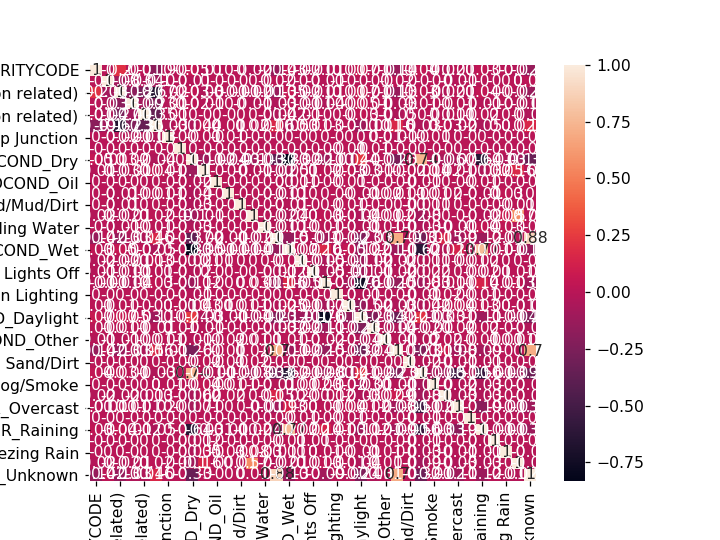

In [7]:
# plot correlation matrix
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_dum.corr().round(2)  # check multi-co-linearity
corr_matrix_plot = sns.heatmap(data=corr_matrix, annot=True) # corr_matrix_sns 
corr_matrix_plot

# Training

In [8]:
# seperate dependent from independent variables
Y = data_dum['SEVERITYCODE']
X = data_dum.drop('SEVERITYCODE', axis=1)

# add location coordinates
X['X'] = data['X']
X['Y'] = data['Y']

In [9]:
# split in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# store test set coordinates
X_test_X = X_test['X']
X_test_Y = X_test['Y']

# remove coordinates train and test set
X_test.drop(['X','Y'], axis=1, inplace=True)
X_train.drop(['X','Y'], axis=1, inplace=True)

C:\Users\mbru\AppData\Local\Continuum\anaconda3\envs\Env_ADS_Capstone\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
# train KNN for different K's
from sklearn.neighbors import KNeighborsClassifier

KNN_train_dic = {}
K_max = 5
for n in range(1, K_max):    
    # train  
    KNN_train_dic[n] = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
    print(KNN_train_dic[n])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [11]:
# train SVM
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
SVM_train = clf.fit(X_train, Y_train)    

'''
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
SVM_train_dic = {}
for k in kernel:
    clf = svm.SVC(kernel = k)
    SVM_train_dic[k] = clf.fit(X_train, Y_train)
    print(k)
'''

"\nkernel = ['linear', 'poly', 'rbf', 'sigmoid']\nSVM_train_dic = {}\nfor k in kernel:\n    clf = svm.SVC(kernel = k)\n    SVM_train_dic[k] = clf.fit(X_train, Y_train)\n    print(k)\n"

In [12]:
# train LR
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)

In [13]:
# train DT
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Testing

In [14]:
# test KNN for different K's
from sklearn import metrics
import numpy as np

mean_acc = np.zeros((K_max-1))
std_acc = np.zeros((K_max-1))
for m in KNN_train_dic: 
    Y_hat = KNN_train_dic[m].predict(X_test)
    mean_acc[m-1] = metrics.accuracy_score(Y_test, Y_hat)
    std_acc[m-1]=np.std(Y_hat==Y_test)/np.sqrt(Y_hat.shape[0])
mean_acc

array([0.53570437, 0.58087623, 0.53265034, 0.67899384])

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


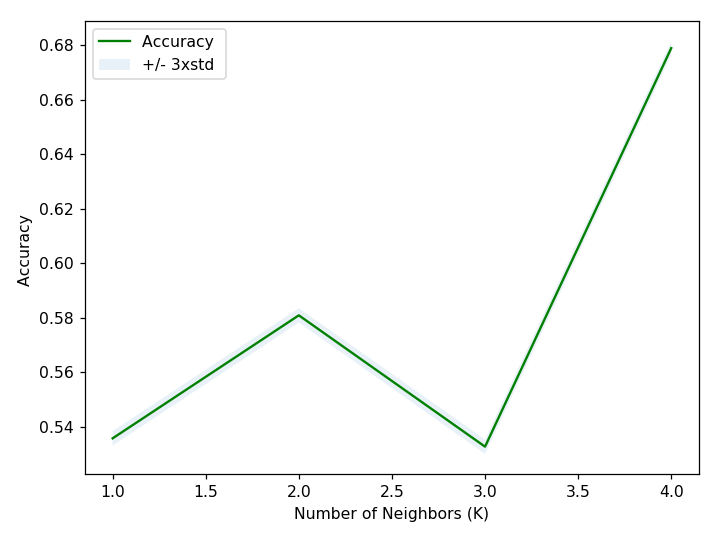

Best accuracy is 0.68 for K = 4


'4'

In [15]:
# plot accuracy and select best KNN model
%matplotlib auto 

plt.plot(range(1, K_max),mean_acc,'g')
plt.fill_between(range(1, K_max), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
best_K = str(np.where(mean_acc == max(mean_acc))[0][0] + 1)
print('Best accuracy is ' + str(round(max(mean_acc), 2)) + ' for K = ' + str(np.where(mean_acc == max(mean_acc))[0][0] + 1))
best_K

In [ ]:
# test SVM for different kernels
'''
ls_Y_hat = []
for m in SVM_train_dic:
    Y_hat = SVM_train_dic[m].predict(X_test)
    ls_Y_hat.append(Y_hat)
'''

In [16]:
# check accuracy and select best SVM model
from sklearn.metrics import jaccard_similarity_score

'''
ls_acc = []
for i in ls_Y_hat:
    ls_acc.append(jaccard_similarity_score(Y_test, i))
x = np.where(ls_acc == max(ls_acc))
x = x[0][0]
best_kernel = kernel[x]
print('Best accuracy is ' + str(round(max(ls_acc), 2)) + ' for kernel = ' + str(kernel[x]))
best_kernel
'''

"\nls_acc = []\nfor i in ls_Y_hat:\n    ls_acc.append(jaccard_similarity_score(Y_test, i))\nx = np.where(ls_acc == max(ls_acc))\nx = x[0][0]\nbest_kernel = kernel[x]\nprint('Best accuracy is ' + str(round(max(ls_acc), 2)) + ' for kernel = ' + str(kernel[x]))\nbest_kernel\n"

In [17]:
# final tests
KNN_Y_hat = KNN_train_dic[int(best_K)].predict(X_test)  # knn
DT_Y_hat = DT.predict(X_test)  # dt
SVM_Y_hat = SVM_train.predict(X_test)  # svm
LOG_Y_hat = lr.predict(X_test)  # log
LOG_Y_hat_prob = lr.predict_proba(X_test)

# Evaluation

In [18]:
# jaccard
from sklearn.metrics import jaccard_similarity_score

KNN_jac = jaccard_similarity_score(Y_test, KNN_Y_hat)
DT_jac = jaccard_similarity_score(Y_test, DT_Y_hat)
SVM_jac = jaccard_similarity_score(Y_test, SVM_Y_hat)
LOG_jac = jaccard_similarity_score(Y_test, LOG_Y_hat)

# accuracy score
from sklearn.metrics import f1_score

KNN_acc = f1_score(Y_test, KNN_Y_hat, average='weighted')  # knn
DT_acc = f1_score(Y_test, DT_Y_hat, average='weighted')  # dt
SVM_acc = f1_score(Y_test, SVM_Y_hat, average='weighted')  # svm
LOG_acc = f1_score(Y_test, LOG_Y_hat, average='weighted')  # svm

# log loss
from sklearn.metrics import log_loss

LOG_loss = log_loss(Y_test, LOG_Y_hat_prob)

C:\Users\mbru\AppData\Local\Continuum\anaconda3\envs\Env_ADS_Capstone\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [19]:
# create table
ls_alg = ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression']
ls_jac = [KNN_jac, DT_jac, SVM_jac, LOG_jac]
ls_acc = [KNN_acc, DT_acc, SVM_acc, LOG_acc]
ls_log = ['na', 'na', 'na', LOG_loss]
df_report = pd.DataFrame()
df_report['Algorithm'] = ls_alg
df_report['Jaccard'] = ls_jac
df_report['F1-score'] = ls_acc
df_report['LogLoss'] = ls_log
df_report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.678994,0.587670,na
1,Decision Tree,0.688517,0.561505,na
2,SVM,0.688517,0.561505,na
3,LogisticRegression,0.688517,0.561505,0.587533


# Mapping

In [29]:
# set-up table for mapping
map_df = pd.concat([pd.Series(KNN_Y_hat).reset_index(drop=True), pd.Series(X_test_X).reset_index(drop=True), pd.Series(X_test_Y).reset_index(drop=True)], axis=1)
map_df.columns

Index([0, 'X', 'Y'], dtype='object')

In [32]:
# create map
import folium
seattle_map = folium.Map(location=[47.60621, -122.33207], zoom_start=12)

# display the map of Seattle
seattle_map

In [33]:
# extract dangerous (potentially injury causing accident) locations
bool = map_df[0] == 1
map_df_acc1 = map_df.loc[bool]
map_df_acc1.head(10)

,0,X,Y
18,1,-122.352340,47.647328
39,1,-122.284959,47.564122
62,1,-122.313130,47.661269
87,1,-122.296271,47.717523
95,1,-122.334091,47.674953
130,1,-122.330723,47.618492
167,1,-122.329059,47.574384
168,1,-122.344814,47.712319
193,1,-122.296050,47.607996
263,1,-122.302481,47.621375


In [34]:
# instantiate a feature group for the incidents in the dataframe
pot_accidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lon, in zip(map_df_acc1.Y, map_df_acc1.X):
    pot_accidents.add_child(
        folium.CircleMarker(
            [lat, lon],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
seattle_map.add_child(pot_accidents)